<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/Frameworks/Keras/DNNs/MNIST%20Data%20Classification/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set Up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

## Load Data

In [2]:
# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

11493376/11490434 [==============================] - 0s 0us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


## Visualize Multiple Images

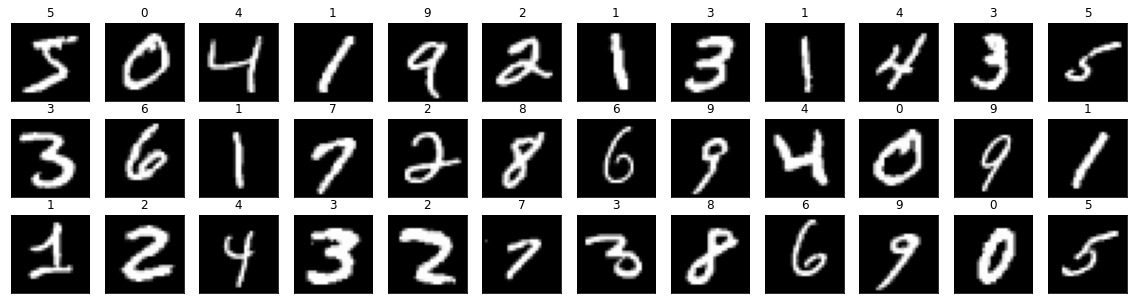

In [3]:
# plot first thirty six training images
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

## Visualize Single Image

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

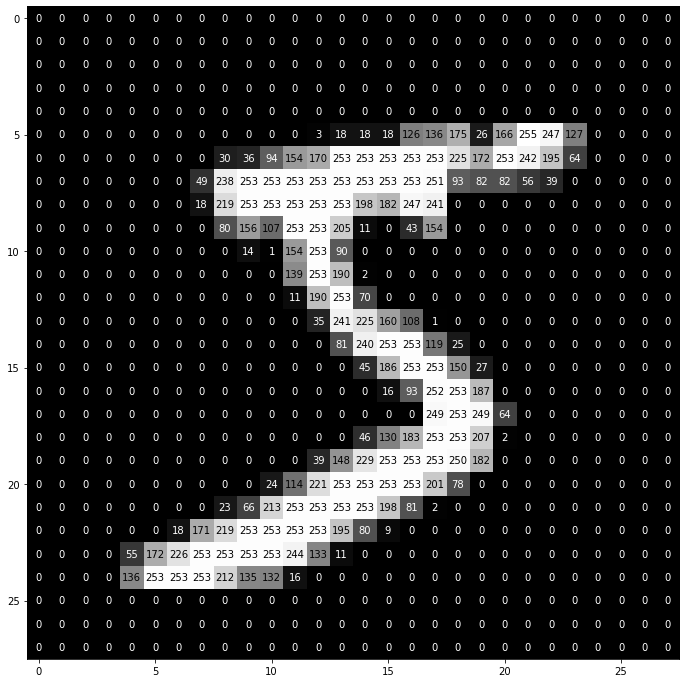

In [5]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

## Rescale Data

In [6]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

## One Hot Encoding

In [7]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Model Set Up

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [9]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

## Compile The Model

In [10]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

## Evaluation Before Training

In [11]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy: %.2f%%' % accuracy)
print('Test Loss : %.6f%%' % score[0])

Test accuracy: 10.55%
Test Loss : 2.313491%


## Train and Save Model 

In [12]:
from keras.callbacks import ModelCheckpoint   

In [13]:
# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer],verbose=1, shuffle=True)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2756 - accuracy: 0.9154 - val_loss: 0.1241 - val_accuracy: 0.9621

Epoch 00001: val_loss improved from inf to 0.12411, saving model to mnist.model.best.hdf5
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1127 - accuracy: 0.9657 - val_loss: 0.0940 - val_accuracy: 0.9715

Epoch 00002: val_loss improved from 0.12411 to 0.09396, saving model to mnist.model.best.hdf5
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9753 - val_loss: 0.0911 - val_accuracy: 0.9738

Epoch 00003: val_loss improved from 0.09396 to 0.09108, saving model to mnist.model.best.hdf5
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9798 - val_loss: 0.0922 - val_accuracy: 0.9749

Epoch 00004: val_loss did not improve from 0.09108
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0523 - accuracy: 0.9843

## Load the Model

In [14]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

## Evaluate Model after Training

In [15]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy: %.2f%%' % accuracy)
print('Test Loss : %.6f%%' % score[0])

Test accuracy: 97.45%
Test Loss : 0.086155%
